<a href="https://colab.research.google.com/github/chiragsharma1690/bitcoin-price-prediction/blob/main/Bitcoin_Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bitcoin Sentimental Analysis and Visualization

## 1. Import the libraries

In [ ]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

## 2. Get the twitter API Credentials

In [ ]:
# write your own twitter keys and tokens for the same

consumerKey = 'COixGv7GejsTcP2EzVT1Z9UQO'
consumerSecret = 'M0YUcPDi2TumNxrVe2WY2lBIumiyeGxqhp4UbVzHKf6qElgkPB'
accessToken = '1347477118276431872-doTbaXTF22ccJpVD3LPQyAxVJMBgwd'
accessTokenSecret = 'K5cGvgxJAttdq07MdUB83cjtFSdyJD2qfaloU979Rgxza'

## 3. Create the API object using the credentials

In [ ]:
# create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# create the API object
api = tweepy.API(authenticate, wait_on_rate_limit = True)

## 4. Get the tweets using Tweepy Cursor

In [ ]:
# terms we want to search in tweets
search_term = '#bitcoin #cryptocurrency #btc -filter:retweets'

# create the cursor object
tweets = tweepy.Cursor(api.search, q = search_term, lang = 'en', tweet_mode = 'extended').items(500)

# As we increase the number of items in items(), it would take more time to read and write the data, so choose it accordingly. 

In [ ]:
# get the tweets from the object
list1 = []
list2 = []
for tweet in tweets:
  list1.append(tweet.created_at)          # get the tweet creation time
  list2.append(tweet.full_text)           # get the full-text of tweet

# it takes some time, according to your input of number of items and search_term, so sit back and relax

In [ ]:
# to strip and modify the structure of time
list3 = []
for i in list1:
  date_only = i.strftime('%Y-%m-%d %H:%M')
  list3.append(date_only)
print(list3)
print(list2)

['2021-05-08 10:42', '2021-05-08 10:41', '2021-05-08 10:38', '2021-05-08 10:38', '2021-05-08 10:37', '2021-05-08 10:36', '2021-05-08 10:35', '2021-05-08 10:33', '2021-05-08 10:31', '2021-05-08 10:31', '2021-05-08 10:30', '2021-05-08 10:30', '2021-05-08 10:30', '2021-05-08 10:29', '2021-05-08 10:28', '2021-05-08 10:28', '2021-05-08 10:27', '2021-05-08 10:24', '2021-05-08 10:21', '2021-05-08 10:20', '2021-05-08 10:20', '2021-05-08 10:19', '2021-05-08 10:17', '2021-05-08 10:15', '2021-05-08 10:14', '2021-05-08 10:13', '2021-05-08 10:11', '2021-05-08 10:09', '2021-05-08 10:06', '2021-05-08 10:05', '2021-05-08 10:03', '2021-05-08 10:02', '2021-05-08 10:00', '2021-05-08 10:00', '2021-05-08 09:58', '2021-05-08 09:53', '2021-05-08 09:52', '2021-05-08 09:51', '2021-05-08 09:51', '2021-05-08 09:49', '2021-05-08 09:48', '2021-05-08 09:47', '2021-05-08 09:46', '2021-05-08 09:45', '2021-05-08 09:44', '2021-05-08 09:43', '2021-05-08 09:40', '2021-05-08 09:39', '2021-05-08 09:36', '2021-05-08 09:34',

In [ ]:
# create a dataframe
df2 = pd.DataFrame(list3, columns=['Date/Time of Tweet'])
df2['Tweets'] = list2
df2.tail(25)

,Date/Time of Tweet,Tweets
475,2021-05-07 23:29,Join the Solanium airdrop and public sale whit...
476,2021-05-07 23:27,Just realized how much mangos are a low time p...
477,2021-05-07 23:26,10 year yield back into positive territory #Bi...
478,2021-05-07 23:25,Please everyone who supports Crypto Lodge on Y...
479,2021-05-07 23:23,100% safe \n100% secured \n100% guaranteed \n1...
480,2021-05-07 23:21,Mp4 of the Teofimo Lopeee _Crypto Face Inspire...
481,2021-05-07 23:21,Buy BTC With Your Credit Card / Fast Crypto Ex...
482,2021-05-07 23:20,"CMON LETS PUMP DOGE AND GIVE IT OUR BEST PUSH,..."
483,2021-05-07 23:18,Black Knight: Number of Homeowners in COVID-19...
484,2021-05-07 23:17,My poll received close to 200 votes yesterday ...


## 5. Clean the tweets

In [ ]:
def cleanTwt(twt):
  twt = re.sub('#bitcoin', 'bitcoin', twt)        # removes '#' from bitcoin
  twt = re.sub('#Bitcoin', 'Bitcoin', twt)        # removes '#' from Bitcoin
  twt = re.sub('#[A-Za-z0-9]+', '', twt)          # removes any string with '#'
  twt = re.sub('\\n', '', twt)                    # removes the '\n' string
  twt = re.sub('https?:\/\/\S+', '', twt)         # removes the hyperlinks
  return twt

df2['Cleaned Tweets'] = df2['Tweets'].apply(cleanTwt)
df2.tail(10)

,Date/Time of Tweet,Tweets,Cleaned Tweets
490,2021-05-07 23:09,"Unfortunately, a person's failed investment is...","Unfortunately, a person's failed investment is..."
491,2021-05-07 23:05,Turkish Government Requiring Exchanges To Repo...,Turkish Government Requiring Exchanges To Repo...
492,2021-05-07 23:04,(Subject: #earnmoney #earnmoneyonline #BTC #Bi...,(Subject: Bitcoin )Join the Solanium aird...
493,2021-05-07 23:03,"The current price of bitcoin is $57,061.00. It...","The current price of bitcoin is $57,061.00. It..."
494,2021-05-07 23:03,I wanna retired from what I do now into maximu...,I wanna retired from what I do now into maximu...
495,2021-05-07 23:03,@POTUS Join Robinhood today with this link and...,@POTUS Join Robinhood today with this link and...
496,2021-05-07 23:02,VanEck files for an #Ethereum ETF with the SEC...,VanEck files for an ETF with the SEC. This ty...
497,2021-05-07 23:02,- Free Bitcoin Faucet. Win Free Bitcoins every...,- Free Bitcoin Faucet. Win Free Bitcoins every...
498,2021-05-07 23:00,Open account with Binance \n#litecoin #bitcoin...,Open account with Binance bitcoin bit...
499,2021-05-07 22:58,📢💥 Eracle token stage2 is #open\n+50% bonus!! ...,📢💥 Eracle token stage2 is +50% bonus!! Hurry u...


## 6. Get the Subjectivity and Objectivity

In [ ]:
# create a function to get the subjectivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity

# create a function to get the polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

df2['Subjectivity'] = df2['Cleaned Tweets'].apply(getSubjectivity)
df2['Polarity'] = df2['Cleaned Tweets'].apply(getPolarity)

df2.head(10)

,Date/Time of Tweet,Tweets,Cleaned Tweets,Subjectivity,Polarity
0,2021-05-08 10:42,👀💥\n\nIt marks May 20th. \n\n$BUY #BUYUSDT #BU...,👀💥It marks May 20th. $BUY _Bitcoin ...,0.200000,0.400000
1,2021-05-08 10:41,Check out the latest Blockchain and Bitcoin ne...,Check out the latest Blockchain and Bitcoin ne...,0.550000,0.350000
2,2021-05-08 10:38,South Korean Police Officers Banned From Buyin...,South Korean Police Officers Banned From Buyin...,0.000000,0.000000
3,2021-05-08 10:38,Bitcoin is at it's Paroxism at 64K $! Time to ...,Bitcoin is at it's Paroxism at 64K $! Time to ...,0.000000,0.375000
4,2021-05-08 10:37,"When #Bitcoin breaks its falling trend, will m...","When Bitcoin breaks its falling trend, will mo...",0.783333,0.022222
5,2021-05-08 10:36,‼️ 3% TOKENS ARE BURNED WITH EVERY PURCHASE AN...,‼️ 3% TOKENS ARE BURNED WITH EVERY PURCHASE AN...,0.000000,0.000000
6,2021-05-08 10:35,Enjin showing an inverse head-and-shoulder pat...,Enjin showing an inverse head-and-shoulder pat...,0.000000,0.000000
7,2021-05-08 10:33,Now $MDT going to 🌙 to the highest level. \n#c...,Now $MDT going to 🌙 to the highest level. B...,0.000000,0.000000
8,2021-05-08 10:31,Wink V/S DOGR #wink #win #wincoin #winkcoin #...,Wink V/S DOGR Bitco...,0.000000,0.000000
9,2021-05-08 10:31,Some morning #Motivation from Coach Bee. Remem...,Some morning from Coach Bee. Remember you are...,0.000000,0.000000


## 7. Get the Sentiment

In [ ]:
# create a function to get the sentiment text
def getSentiment(score):
  if score < 0 and score >= -0.33:
    return 'Weakly Negative'
  elif score < -0.33 and score >= -0.67:
    return 'Negative'
  elif score < -0.67:
    return 'Strongly Negative'
  elif score == 0:
    return 'Neutral'
  elif score > 0 and score <= 0.3:
    return 'Weakly Positive'
  elif score > 0.3 and score <= 0.67:
    return 'Positive'
  else:
    return 'Strongly Positive'

In [ ]:
# create a column to store the text sentiment
df2['Sentiment'] = df2['Polarity'].apply(getSentiment)
df2.head()

,Date/Time of Tweet,Tweets,Cleaned Tweets,Subjectivity,Polarity,Sentiment
0,2021-05-08 10:42,👀💥\n\nIt marks May 20th. \n\n$BUY #BUYUSDT #BU...,👀💥It marks May 20th. $BUY _Bitcoin ...,0.200000,0.400000,Positive
1,2021-05-08 10:41,Check out the latest Blockchain and Bitcoin ne...,Check out the latest Blockchain and Bitcoin ne...,0.550000,0.350000,Positive
2,2021-05-08 10:38,South Korean Police Officers Banned From Buyin...,South Korean Police Officers Banned From Buyin...,0.000000,0.000000,Neutral
3,2021-05-08 10:38,Bitcoin is at it's Paroxism at 64K $! Time to ...,Bitcoin is at it's Paroxism at 64K $! Time to ...,0.000000,0.375000,Positive
4,2021-05-08 10:37,"When #Bitcoin breaks its falling trend, will m...","When Bitcoin breaks its falling trend, will mo...",0.783333,0.022222,Weakly Positive


## 8. Export the downloaded data to CSV file

In [ ]:
# save the dataset externally in a csv file
df2.to_csv('bitcoin_sentiment.csv')

In [ ]:
# in case of loss of data
from google.colab import files
data_to_load = files.upload()       # to import the saved data

In [ ]:
df2 = pd.read_csv('bitcoin_sentiment.csv')

## 9. Data Visualizations of Bitcoin Sentiment

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


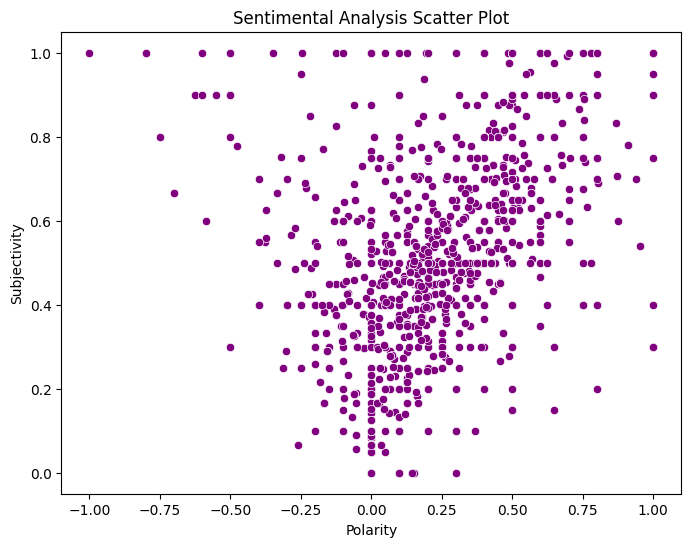

In [ ]:
# create a scatter plot to show the subjectivity and polarity
plt.figure(figsize = (8, 6))

sns.scatterplot(df2['Polarity'], df2['Subjectivity'], color = 'Purple')
plt.title('Sentimental Analysis Scatter Plot')

plt.ylabel('Subjectivity')
plt.show()

As we can see from the above scatter plot, we observe that:
1. The majority of tweets' polarity are positive, and hence can say that the bitcoin and cryptocurrencies are having positive tweets

2. As the tweets are positive, we can say that the price of bitcoin is going down anytime.

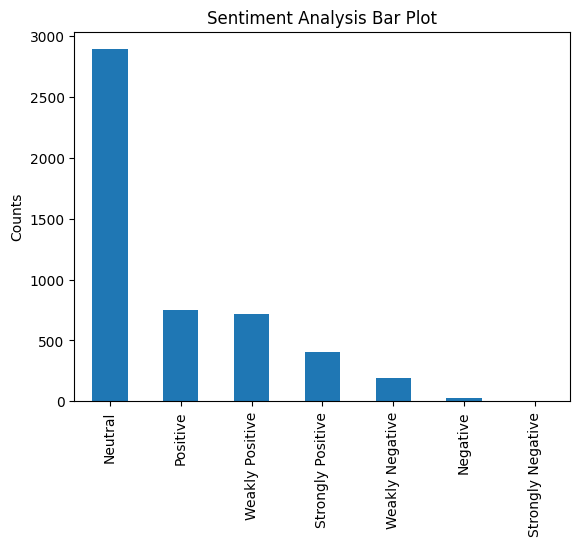

In [ ]:
# create a bar chart to show the count of Positive, Negative, and Neutral sentiments
df2['Sentiment'].value_counts().plot(kind = 'bar')
plt.title('Sentiment Analysis Bar Plot')
plt.ylabel('Counts')
plt.show()

From the above bar chart, we observe that:
1. From approximately no negative tweets, we can infer that the price is neither going too up nor down, and is maintained at same price.

2. There are much of the positive tweets, which indicates that the people are showing their interest in the bitcoin crypto market. 

3. As per the concern of neutral tweets, they may be tweets for business purposes or made by bots.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


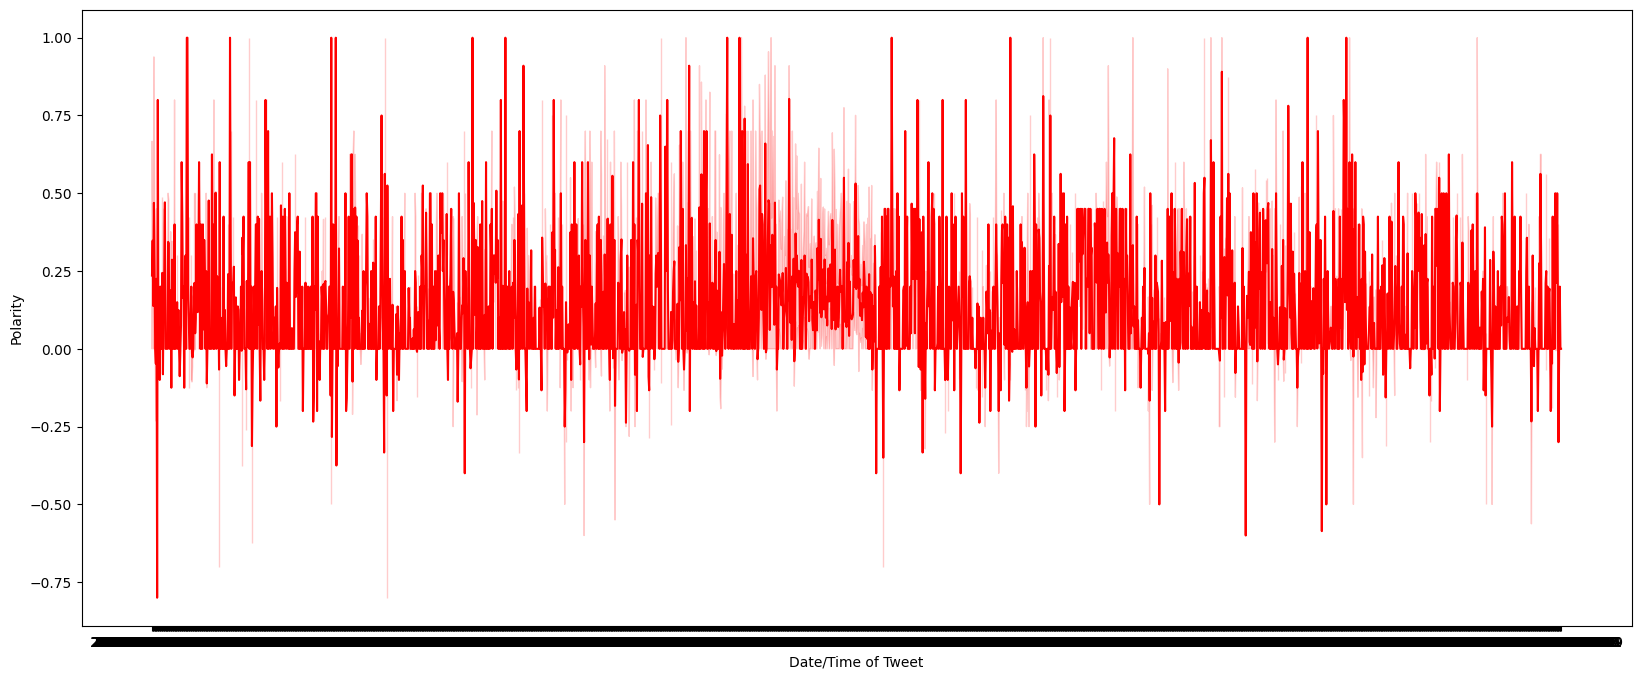

In [ ]:
plt.figure(figsize=(20,8))
plt.style.use('default')
sns.lineplot('Date/Time of Tweet', 'Polarity', data = df2, color = 'red');

From the above line graph, we observe that, as the trend of polarity is constant at this 3-days interval of twitter tweets, we can say that the bitcoin price would be constant.

But, when it start to show rise or fall in polarity for a longer period of time, we could say that the price are just starting to go up/down and we can buy or sell the bitcoin accordingly.